<a href="https://colab.research.google.com/github/silviahbf/MACK-Big_Data_Analytics/blob/main/Trilha_1_Tarefa_Ling_Prog_Silvia_Fernandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

Aluna: **SILVIA HELENA BARROS FERNANDES**

Curso: **BDPA-E - Big Data & Analytics**

Componente: **Paradigmas de Linguagem de Programação em Ciência de Dados**

Trilha 1: **Tarefa**

# > Introdução

Livro escolhido: **A Revolução dos Bichos - George Orwell**

Romance satírico do escritor inglês George Orwell, publicado no Reino Unido em 17 de agosto de 1945 e incluído pela revista americana Time na Lista dos 100 melhores romances da língua inglesa. A sátira feita pelo livro à União Soviética comunista obteve o 31.º lugar na lista dos melhores romances do século XX organizada pela Modern Library List.

O livro narra uma história de corrupção e traição e recorre a figuras de animais para retratar as fraquezas humanas e demolir o "paraíso comunista" proposto pela União Soviética na época de Stalin. A revolta dos animais da quinta contra os humanos é liderada pelos porcos Bola-de-Neve (Snowball) e Napoleão (Napoleon). Os animais tentam criar uma sociedade utópica, porém Napoleão, seduzido pelo poder, afasta Bola-de-Neve e estabelece uma ditadura tão corrupta quanto a sociedade de humanos.

Para o autor, um socialista democrático e membro do Partido Trabalhista Independente por muitos anos, a obra é uma sátira à política stalinista que, segundo sua ótica, teria traído os princípios da Revolução Russa de 1917.

Fonte: https://pt.wikipedia.org/wiki/Animal_Farm

# > Aquisição de Dados

In [4]:
import urllib.request

# cria uma lista vazia
texto = []

for line in urllib.request.urlopen('https://raw.githubusercontent.com/silviahbf/MACK-Big_Data_Analytics/main/Paradigmas_Linguagem_Programacao/2015-gorwell-rev_bichos.txt'): 
    texto.append(line.decode('utf-8'))

for i in range(len(texto)):

    # converte o texto todo para letra minúscula
    texto[i] = texto[i].lower()
    
    # remove pontuações
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','')

# > Construção do Dicionário

In [5]:
# cria um dicionário vazio
mydict = {}

for line in texto:

  # converte para letra minúscula
  line = line.lower()

  # separa palavra
  words = line.split()

# frequência das palavras

  # para cada palavra em words
  for word in words:
    
    # se palavra não está no dicionário
    if word not in mydict.keys():

      # acrescenta a word com o valor 1
      mydict[word] = 1

    # se a entrada já existe
    else:

      # apenas soma 1 ao valor já existente
      mydict[word] =  mydict[word] + 1    

print(mydict)

{'universidade': 2, 'estadual': 2, 'do': 281, 'norte': 2, 'paraná': 3, 'george': 3, 'orwell': 6, 'a': 835, 'revolução': 24, 'dos': 162, 'bichos': 153, 'um': 319, 'clássico': 1, 'da': 283, 'literatura': 2, 'inglesa': 3, 'uenp': 4, '2015': 3, 'obra': 4, 'em': 291, 'domínio': 1, 'público': 3, 'edição': 1, 'eletrônica': 1, '–': 164, 'capa:': 1, 'newton': 2, 'c': 4, 'braga': 2, 'ilustração:': 1, 'falnanglyin': 1, 'd4plqxg': 1, 'editoração': 1, 'eletrônica:': 1, 'o79r': 1, '/': 1, 'cornélio': 3, 'procópio': 3, 'pr:': 1, '86': 2, 'p': 1, ':': 1, '22cm': 1, '1': 1, 'i': 3, 'título': 2, 'cdd': 1, '823': 1, 'cdu': 1, '82111182-311-4': 1, '3': 3, 'apresentação': 2, 'é': 62, 'uma': 217, 'distopia': 1, 'livro': 5, 'alegórico': 1, 'de': 1308, 'ge-orge': 1, 'publicado': 1, '17': 2, 'agosto': 3, '1945': 1, 'há': 9, 'setenta': 1, 'anos': 17, 'na': 153, 'inglaterra': 22, 'acordo': 15, 'com': 282, 'o': 676, 'reflete': 1, 'os': 574, 'acontecimentos': 1, 'que': 734, 'se': 187, 'seguiram': 1, 'à': 127, 'com

# > Exibição dos Resultados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


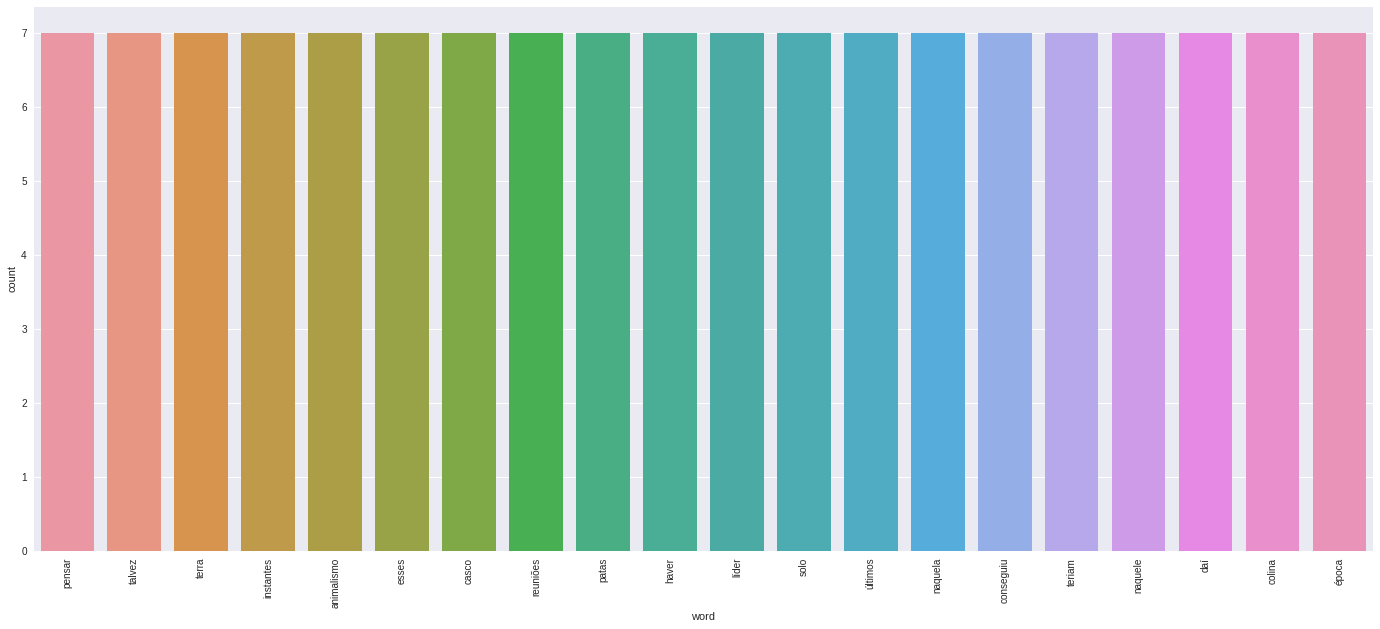

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# cria DataFrame
df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)

# somente termos com mais de 3 ocorrências
df = df[df['count'] > 3]

# para livros ou textos com muitos termos limita a um número mínimo de termos
df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ]

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

# > Conclusão

Escolhi o livro A Revolução dos Bichos por se tratar de uma obra clássica que mesmo tendo sido escrita há muitos anos, permanece atual e extremamente relevante.

Sobre o código, após alguns testes e por conhecer a obra escolhida, optei por alterar o número de ocorrências de 4 para 3 na linha df = df[df['count'] > 3], pois na minha visão, dessa forma os termos apresentados dão uma pista melhor do que se trata essa obra. Obviamente, se eu não conhecesse esse livro, talvez essa visão não seria tão evidente para mim.